MeterGroup(meters=
  ElecMeter(instance=1, building=1, dataset=None, appliances=[])
  ElecMeter(instance=2, building=1, dataset=None, appliances=[])
  ElecMeter(instance=3, building=1, dataset=None, appliances=[])
  ElecMeter(instance=4, building=1, dataset=None, appliances=[])
  ElecMeter(instance=5, building=1, dataset=None, appliances=[])
)


C:\Users\jenic\anaconda3\envs\nilmtk-env\lib\site-packages\nilmtk\metergroup.py:85: RuntimeWarning: Building 1 has an empty 'appliances' list.
  warnings.warn("Building {} has an empty 'appliances' list."


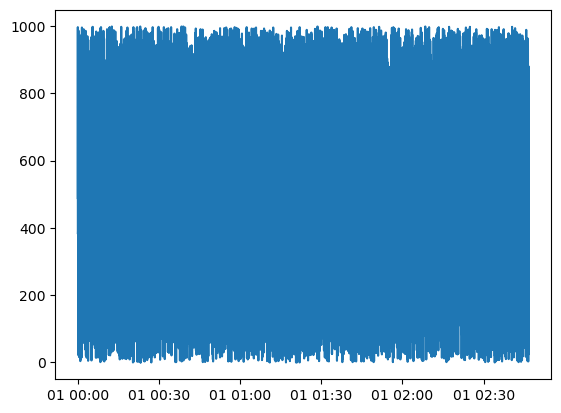

In [167]:
import matplotlib.pyplot as plt
from nilmtk import DataSet
%matplotlib inline

ds = DataSet(r"C:\Users\jenic\FINAL\random.h5")
elec = ds.buildings[1].elec

print(elec)
plt.plot(elec[1].power_series_all_data())

In [2]:
from nilmtk.dataset_converters import convert_refit
convert_refit(r"FINAL/REFIT", 'Refit.h5')

Loading house 1... Using CLEAN filenames (CLEAN_HouseXX.csv)
1 2 3 4 5 6 7 8 9 10 
Loading house 2... 1 2 3 4 5 6 7 8 9 10 
Loading house 3... 1 2 3 4 5 6 7 8 9 10 
Loading house 4... 1 2 3 4 5 6 7 8 9 10 
Loading house 5... 1 2 3 4 5 6 7 8 9 10 
Loading house 6... 1 2 3 4 5 6 7 8 9 10 
Loading house 7... 1 2 3 4 5 6 7 8 9 10 
Loading house 8... 1 2 3 4 6 7 8 9 10 
Loading house 9... 1 2 3 4 5 6 7 8 9 10 
Loading house 10... 1 2 3 4 5 6 7 8 9 10 
Loading house 11... 1 2 3 4 5 6 7 8 9 10 
Loading house 12... 1 2 3 4 5 6 7 8 9 10 
Loading house 13... 1 2 3 4 5 6 7 8 9 10 
Loading house 15... 1 2 3 4 5 6 7 8 9 10 
Loading house 16... 1 2 3 4 5 6 7 8 9 10 
Loading house 17... 1 2 3 4 5 6 7 8 9 10 
Loading house 18... 1 2 3 4 5 6 7 8 9 10 
Loading house 19... 1 2 3 4 5 6 7 8 9 10 
Loading house 20... 1 2 3 4 5 6 7 8 9 10 
Loaded metadata


AttributeError: 'NoneType' object has no attribute '_v_attrs'

In [174]:
from nilmtk.dataset_converters import convert_refit
convert_refit(r"C:\Users\jenic\FINAL\CLEAN_REFIT_081116", 'House1.h5')

ValueError: The file 'House1.h5' is already opened.  Please close it before reopening in write mode.

MeterGroup(meters=
  ElecMeter(instance=1, building=1, dataset='REFIT', site_meter, appliances=[])
  ElecMeter(instance=2, building=1, dataset='REFIT', appliances=[Appliance(type='fridge', instance=1)])
  ElecMeter(instance=3, building=1, dataset='REFIT', appliances=[Appliance(type='freezer', instance=1)])
  ElecMeter(instance=4, building=1, dataset='REFIT', appliances=[Appliance(type='freezer', instance=2)])
  ElecMeter(instance=5, building=1, dataset='REFIT', appliances=[Appliance(type='washer dryer', instance=1)])
  ElecMeter(instance=6, building=1, dataset='REFIT', appliances=[Appliance(type='washing machine', instance=1)])
  ElecMeter(instance=7, building=1, dataset='REFIT', appliances=[Appliance(type='dish washer', instance=1)])
  ElecMeter(instance=8, building=1, dataset='REFIT', appliances=[Appliance(type='computer', instance=1)])
  ElecMeter(instance=9, building=1, dataset='REFIT', appliances=[Appliance(type='television', instance=1)])
  ElecMeter(instance=10, building=1, data

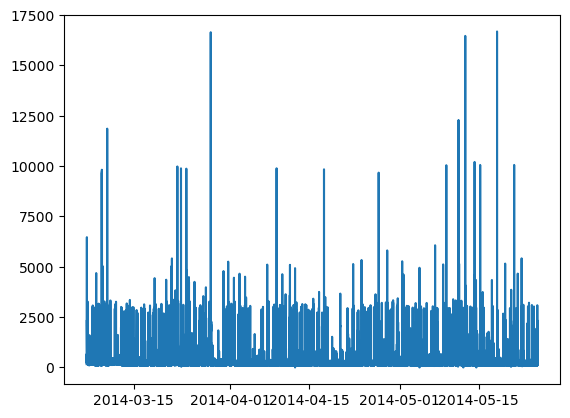

In [125]:
import matplotlib.pyplot as plt
from nilmtk import DataSet
%matplotlib inline

ds = DataSet(r"C:\Users\jenic\House1.h5")
elec = ds.buildings[1].elec

print(elec)
plt.plot(elec[1].power_series_all_data())

In [188]:
import tables

# Force-close all open HDF5 files
tables.file._open_files.close_all()


Closing remaining open files:House1.h5...doneC:\Users\jenic\House1.h5...doneC:\Users\jenic\FINAL\random.h5...doneoutput.h5...doneC:\Users\jenic\House1.h5...done


In [126]:
ds.set_window(start='2014-03-15',end='2015-03-16')
elec_1 = ds.buildings[1].elec

In [127]:
mains=elec_1.mains()
submeters=elec_1.submeters()

In [128]:
mains.available_ac_types('power')

['active']

In [129]:
submeters.available_ac_types('power')

['active']

In [130]:
from nilmtk.legacy.disaggregate.hart_85 import Hart85
h = Hart85()

In [131]:
#Training the model using HART85 disaggregation method

h.train(mains,columns=[('power','active')])

Finding Edges, please wait ...
Edge detection complete.
Creating transition frame ...
Transition frame created.
Creating states frame ...
States frame created.
Finished.


In [74]:
h.export_model('refit_hart.h5')

In [75]:
h.import_model('refit_hart.h5')

In [140]:
elec

MeterGroup(meters=
  ElecMeter(instance=1, building=1, dataset='REFIT', site_meter, appliances=[])
  ElecMeter(instance=2, building=1, dataset='REFIT', appliances=[Appliance(type='fridge', instance=1)])
  ElecMeter(instance=3, building=1, dataset='REFIT', appliances=[Appliance(type='freezer', instance=1)])
  ElecMeter(instance=4, building=1, dataset='REFIT', appliances=[Appliance(type='freezer', instance=2)])
  ElecMeter(instance=5, building=1, dataset='REFIT', appliances=[Appliance(type='washer dryer', instance=1)])
  ElecMeter(instance=6, building=1, dataset='REFIT', appliances=[Appliance(type='washing machine', instance=1)])
  ElecMeter(instance=7, building=1, dataset='REFIT', appliances=[Appliance(type='dish washer', instance=1)])
  ElecMeter(instance=8, building=1, dataset='REFIT', appliances=[Appliance(type='computer', instance=1)])
  ElecMeter(instance=9, building=1, dataset='REFIT', appliances=[Appliance(type='television', instance=1)])
  ElecMeter(instance=10, building=1, data

In [147]:
 df_freezer = next(elec['freezer', 2].load())
merged_df = pd.merge(df[0], df_freezer, left_index=True, right_index=True)

C:\Users\jenic\anaconda3\envs\nilmtk-env\lib\site-packages\pandas\core\reshape\merge.py:617: UserWarning: merging between different levels can give an unintended result (1 levels on the left, 2 on the right)
  warnings.warn(msg, UserWarning)


In [148]:
merged_df.head()

,0,"(power, active)"
Unix,,
2014-03-15 01:52:00+00:00,0,2
2014-03-15 02:20:00+00:00,159,3
2014-03-15 02:21:00+00:00,159,3
2014-03-15 02:44:00+00:00,0,2
2014-03-15 03:12:00+00:00,0,2


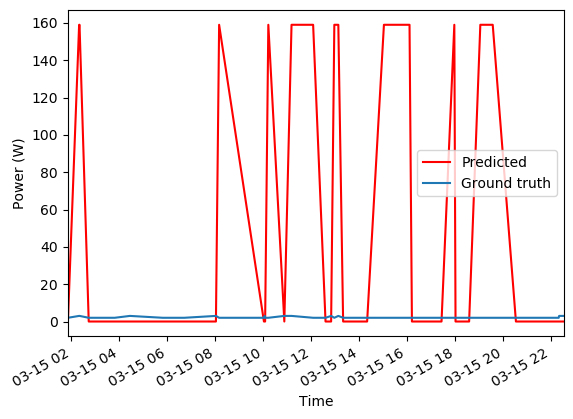

In [194]:
merged_df[0].plot(c='r')
merged_df['power', 'active'].plot()
plt.legend(["Predicted", "Ground truth"]);
plt.ylabel("Power (W)")
plt.xlabel("Time");

In [187]:
df.tail()

,0,1,2,3,4,5
Unix,,,,,,
2014-03-15 23:55:00+00:00,159,2426,589,0,0,0
2014-03-15 23:56:00+00:00,159,2426,589,0,0,0
2014-03-15 23:57:00+00:00,159,2426,589,0,0,0
2014-03-15 23:58:00+00:00,159,2426,589,0,0,0
2014-03-15 23:59:00+00:00,0,0,0,0,0,0
